<a href="https://colab.research.google.com/github/Mgobeaalcoba/Inferential_statistics_with_python/blob/main/Validaci%C3%B3n_Cruzada_en_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Validación Cruzada

Es la técnica utilizada para evaluar los resultados de un análisis estadístico y garantizar que son independientes de la partición entre datos de entrenamiento y prueba.

#### Procedimiento:

1. Hay que dividir los datos de forma aleatoria en K grupos de tamaño similar.
2. Usar K-1 grupos para entrenar el modelo
3. Tomar uno de estos grupos para validar el modelo
4. Repetir K veces usando grupos distintos en cada iteración

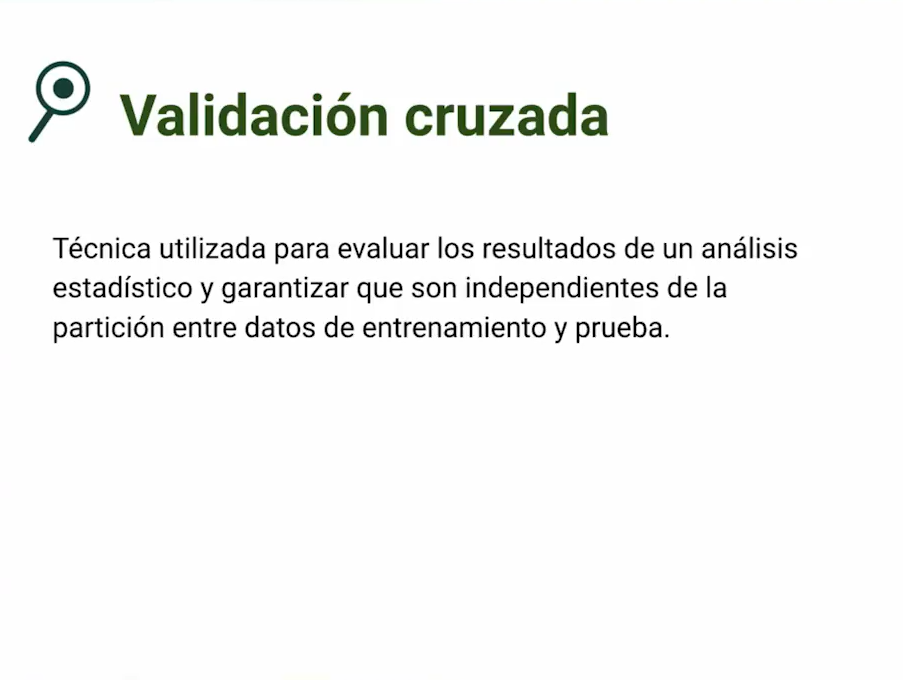

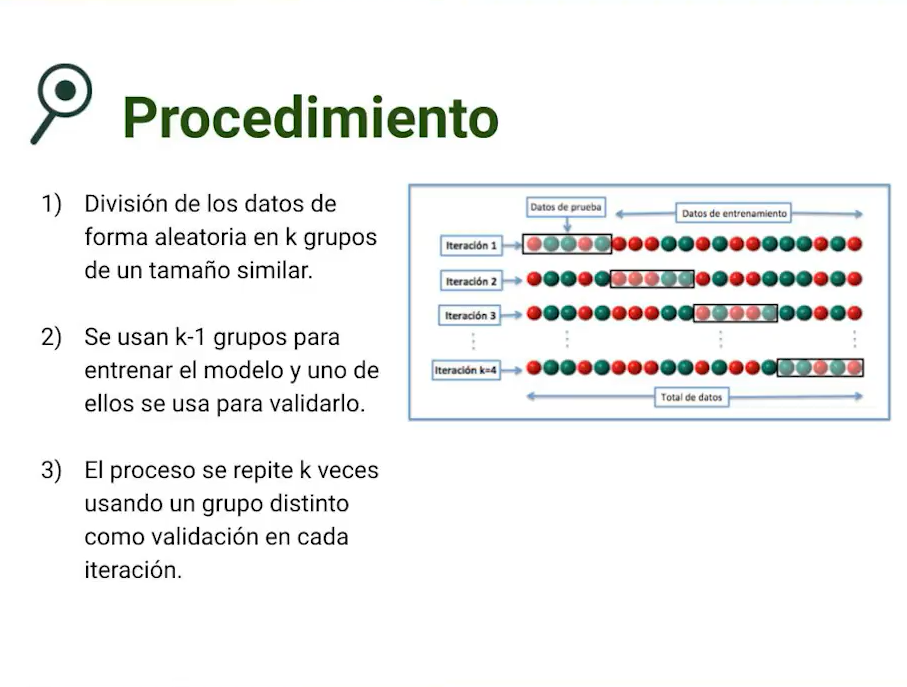

In [1]:
import pandas as pd
import numpy as np
import io

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cancerdata_80367619-ee78-44cd-a7dc-7970bf56fa94.csv to cancerdata_80367619-ee78-44cd-a7dc-7970bf56fa94.csv


In [3]:
url = '/content/cancerdata_80367619-ee78-44cd-a7dc-7970bf56fa94.csv'
df = pd.read_csv(url)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# Separo mis variables numéricas de mis variables categóricas
X = df.iloc[ : , 2 : ] # Numericas. Todas las filas y de la columna 2 en adelante
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
Y = df.iloc[ : , 1] # Categóricas, solo la columna 1 con todas sus rows
Y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

#### El conjunto X tiene las variables independientes y el conjunto Y tiene la variable dependiente o predictiva.

In [11]:
Y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<Axes: >

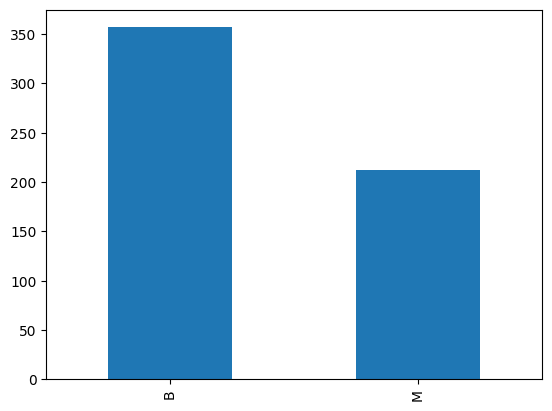

In [12]:
Y.value_counts().plot(kind='bar')

In [13]:
# Tenemos benignos y malignos por lo que podemos avanzar con la validación cruzada:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Nos ayuda a dividir entre modelo de training y modelo de test


In [22]:
# Creamos los grupos de entrenamiento y de test usando validación cruzada gracias a Scikit Learn
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.3, # Tamaño de test
                                                    random_state=4) # Accuracy del test

# Creamos el modelo Arbol de Decisión
modelo = DecisionTreeClassifier()

# Entrenamos el modelo:
modelo.fit(X_train, Y_train) # Entreno con las variables de train

# Resultado del entrenamiento:
resultado = modelo.score(X_test, Y_test) # Aplico el modelo entranado con las variables de testeo.
print(resultado)


0.8947368421052632


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

El score del modelo nos está indicando que es un modelo bastante bueno. Dado que su resultado se acerca a 1.

Veamos como quedó el arbol de decisión para este modelo:

In [17]:
# Predecimos sobre nuestro set
Y_predic = modelo.predict(X_test)

# Comaparamos con las etiquetas reales
print('Precision: ', accuracy_score(Y_predic, Y_test))

Precision:  0.9181286549707602


# Nos da exactamente el mismo numero de accuracy calculado como lo hicimos arriba

In [19]:
# creamos una matriz de confusión
confusion_matrix(Y_test, Y_predic)

array([[106,  11],
       [  3,  51]])

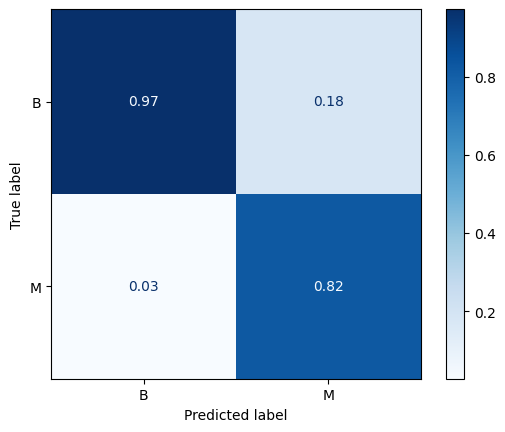

In [21]:
# creamos un gráfico para la matriz de confusión normalizado con los valores calculados sobre las columnas
plot_confusion_matrix = ConfusionMatrixDisplay.from_estimator(estimator= modelo,
                                                              X=X_test,
                                                              y=Y_test,
                                                              cmap=plt.cm.Blues,
                                                              values_format='.2f',
                                                              normalize='pred')
plot_confusion_matrix

In [23]:
# Validación cruzada usando el tipo "k fold":
from sklearn.model_selection import KFold

In [28]:
# Creamos el modelo nuevamente:
modelo = DecisionTreeClassifier()
kfold_validacion = KFold(10) # Queremos hacer 10 validaciones cruzadas usando KFold

In [29]:
# Conclusión:
## Buscamos que de esas 10 muestras que nos trae KFold vamos a calcular los promedios para demostrar la solidez de nuestro modelo
## Buscamos no sesgarnos y ver que realmente el modelo está funcionados

from sklearn.model_selection import cross_val_score

resultados = cross_val_score(modelo,
                             X,
                             Y,
                             cv= kfold_validacion) # cv : cross validation o validación cruzada

print(resultados)
resultados.mean()

[0.9122807  0.9122807  0.87719298 0.9122807  0.92982456 0.96491228
 0.9122807  0.94736842 0.94736842 0.94642857]


0.9262218045112782

#### Vemos que todos los resultados de precisión de cada uno de nuestros grupos armados para hacer validación cruzada son muy buenos. Están practivamente todos arriba del 0.9 y el promedio general de cada prueba está en 0.92